In [10]:
#Samarth Borade
#BTI SEM 10
#C009
#EXP 5 : Implementing parameter tuning and sequential model in python

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [12]:
df=pd.read_csv('house_price.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [13]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()

In [16]:
df.iloc[:,-4:]

,street,city,statezip,country
0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,709 W Blaine St,Seattle,WA 98119,USA
2,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,857 170th Pl NE,Bellevue,WA 98008,USA
4,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...
4595,501 N 143rd St,Seattle,WA 98133,USA
4596,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,5148 S Creston St,Seattle,WA 98178,USA


In [17]:
df['street']=label_encoder.fit_transform(df['street'])
df['city']=label_encoder.fit_transform(df['city'])
df['statezip']=label_encoder.fit_transform(df['statezip'])

In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [19]:
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]

In [20]:
y=df['price']

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

for col in X.columns:
  X[col]=scaler.fit_transform(X[[col]])

/var/folders/fp/tqnwc7rd219_w0rxtd8b8pz00000gn/T/ipykernel_93811/3103609303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=scaler.fit_transform(X[[col]])
/var/folders/fp/tqnwc7rd219_w0rxtd8b8pz00000gn/T/ipykernel_93811/3103609303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=scaler.fit_transform(X[[col]])
/var/folders/fp/tqnwc7rd219_w0rxtd8b8pz00000gn/T/ipykernel_93811/3103609303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [25]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

2024-01-17 20:33:07.572131: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-17 20:33:07.572151: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-17 20:33:07.572160: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-17 20:33:07.572400: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-17 20:33:07.572732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


2024-01-17 20:33:08.155305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 3s 13ms/step - loss: 442253574144.0000 - val_loss: 391403175936.0000
Epoch 2/50
101/101 [==============================] - 1s 12ms/step - loss: 442253246464.0000 - val_loss: 391402881024.0000
Epoch 3/50
101/101 [==============================] - 1s 12ms/step - loss: 442252984320.0000 - val_loss: 391402520576.0000
Epoch 4/50
101/101 [==============================] - 1s 12ms/step - loss: 442252034048.0000 - val_loss: 391401275392.0000
Epoch 5/50
101/101 [==============================] - 1s 12ms/step - loss: 442250657792.0000 - val_loss: 391400161280.0000
Epoch 6/50
101/101 [==============================] - 1s 13ms/step - loss: 442249445376.0000 - val_loss: 391398719488.0000
Epoch 7/50
101/101 [==============================] - 1s 12ms/step - loss: 442247905280.0000 - val_loss: 391397212160.0000
Epoch 8/50
101/101 [==============================] - 1s 12ms/step - loss: 442246037504.0000 - val_loss: 391395704832.0000
Epoch 9/50
101/101 [=======

In [28]:
import matplotlib.pyplot as plt

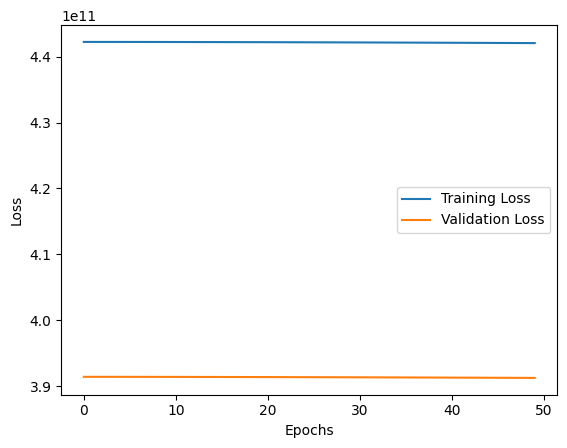

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
y_pred = model.predict(X_test)
mse =mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

22/22 [==============================] - 0s 2ms/step
Mean Squared Error on Test Set: 1694557511160.4268


In [55]:
import numpy as np

# Sample data representing recommendations from your initial model
recommendations = [
    {"song_id": 1, "popularity": 80, "artist": "Artist1", "artist_popularity": 90, "genre": "Pop", "decade": 2000},
    {"song_id": 2, "popularity": 70, "artist": "Artist2", "artist_popularity": 85, "genre": "Rock", "decade": 1990},
    # Add more recommendations as needed
]

# New input song
input_song = {"song_id": 3, "popularity": 90, "artist": "Artist2", "artist_popularity": 85, "genre": "Rock", "decade": 2000}

# User preferences (weights for each parameter)
weights = {
    "popularity": 0.1,
    "artist_popularity": 0.1,
    "artist": 0.2,
    "genre": 0.3,
    "decade": 0.2,
}

# Add the new input song to recommendations
recommendations.append(input_song)

# Separate the input song from recommendations
input_song_index = len(recommendations) - 1
input_song = recommendations.pop(input_song_index)

def calculate_similarity_score(song1, song2, weights):
    # Calculate the similarity score between two songs based on the assigned weights
    similarity_score = sum(weights[parameter] * float(song1[parameter] == song2[parameter]) for parameter in weights)
    return similarity_score

def rank_songs(recommendations, input_song, weights):
    # Calculate similarity scores
    for recommendation in recommendations:
        recommendation['similarity_score'] = calculate_similarity_score(input_song, recommendation, weights)

    # Rank songs based on similarity scores
    ranked_songs = sorted(recommendations, key=lambda x: x['similarity_score'], reverse=True)

    return ranked_songs

# Example usage
ranked_songs = rank_songs(recommendations, input_song, weights)

# Display the top-ranked songs with scores rounded to 2 decimal places
for i, song in enumerate(ranked_songs):
    print(f"{i + 1}. Song {song['song_id']} - Similarity Score: {round(song['similarity_score'], 2)}")


1. Song 2 - Similarity Score: 0.6
2. Song 1 - Similarity Score: 0.2
